### Import Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
df = pd.read_excel('Raw Data/Average (Mean) Usual Hours Worked Per Week of Employed Residents Aged Fifteen And Over By Nature of Employment (June).xlsx', header = None, dtype=str)

### Data Cleaning

In [3]:
# Remove rows with NaN values
df = df.dropna()

# Transpose the DataFrame
df = df.T

# Use the first row as the header
df.columns = df.iloc[0]

# Drop the first row
df = df[1:]

# Create a boolean mask based on whether the "Year" column contains "2007a"
mask = df['NATURE OF EMPLOYMENT'].str.contains('2007a')

# Filter the DataFrame using the boolean mask
df = df[~mask]

# Replace "n.a." with NaN
df = df.replace('n.a.', np.nan)

df.head()

,NATURE OF EMPLOYMENT,Total,Full-Time,Part-Time
1,1999,47.5,48.7,25.9
2,2000,NaN,NaN,NaN
3,2001,47.5,48.9,22.3
4,2002,47.4,48.8,22.4
5,2003,47.4,49,23.7


In [4]:
df.dtypes

0
NATURE OF EMPLOYMENT    object
Total                   object
Full-Time               object
Part-Time               object
dtype: object

### Extracting Columns

In [5]:
# select columns
avg_hrs_worked = df[['NATURE OF EMPLOYMENT', 'Full-Time']]

# sort dataframe by year column
avg_hrs_worked = avg_hrs_worked.sort_values(by='NATURE OF EMPLOYMENT')

# rename column to year
avg_hrs_worked = avg_hrs_worked.rename(columns={'NATURE OF EMPLOYMENT': 'Year'})

# convert the "Year" column to datetime format
avg_hrs_worked['Year'] = pd.to_datetime(avg_hrs_worked['Year'], format='%Y')

# convert the "Full-Time" column to float format
avg_hrs_worked['Full-Time'] = avg_hrs_worked['Full-Time'].astype(float)

avg_hrs_worked.head()

,Year,Full-Time
1,1999-01-01,48.7
2,2000-01-01,NaN
3,2001-01-01,48.9
4,2002-01-01,48.8
5,2003-01-01,49.0


In [6]:
avg_hrs_worked.dtypes

0
Year         datetime64[ns]
Full-Time           float64
dtype: object

### Plot Yearly Data

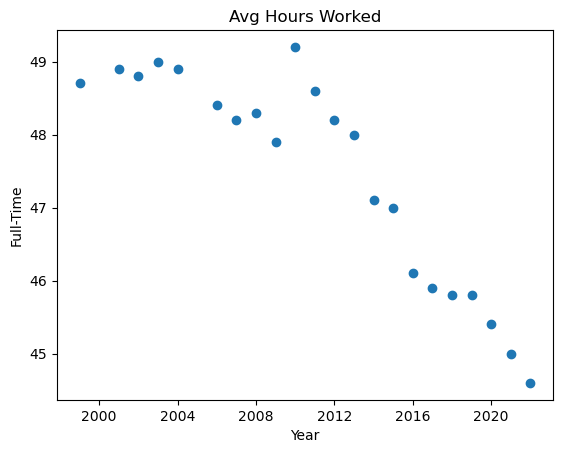

In [7]:
# Plot the data
plt.scatter(x='Year', y='Full-Time', data=avg_hrs_worked)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Full-Time')
plt.title('Avg Hours Worked')

# Show the plot
plt.show()

In [13]:
df = avg_hrs_worked.rename(columns={'NATURE OF EMPLOYMENT': 'Year', 'Full-Time': 'Average Full-Time Working Hours Per Week'})

In [14]:
# Export monthtly data to CSV
df.to_csv('Cleaned Data/Average Working Hours.csv')